In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
color = sns.color_palette()

%matplotlib inline

In [2]:
df_train = pd.read_csv('C:/Users/Admin/Desktop/SimpliLearn/Data Science with machine leraning/Project/Marcidies Benz/train/train.csv')
df_test = pd.read_csv('C:/Users/Admin/Desktop/SimpliLearn/Data Science with machine leraning/Project/Marcidies Benz/test/test.csv')

In [3]:
print("Train shape : ", df_train.shape)
print("Test shape : ", df_test.shape)

Train shape :  (4209, 378)
Test shape :  (4209, 377)


In [4]:
# Let us look at the top 5 rows.
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


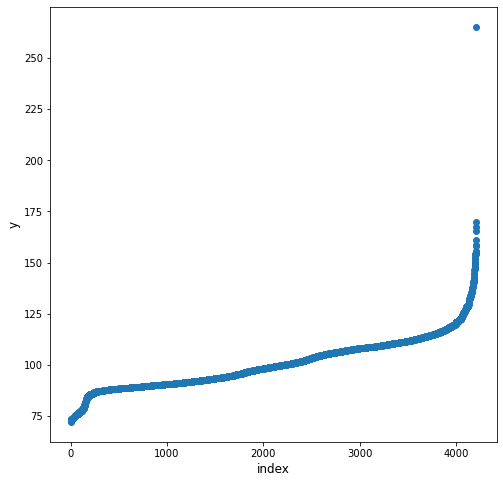

In [5]:
plt.figure(figsize=(8,8))
plt.scatter(range(df_train.shape[0]),np.sort(df_train.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

D:\SimpliLearn\Python\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
D:\SimpliLearn\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


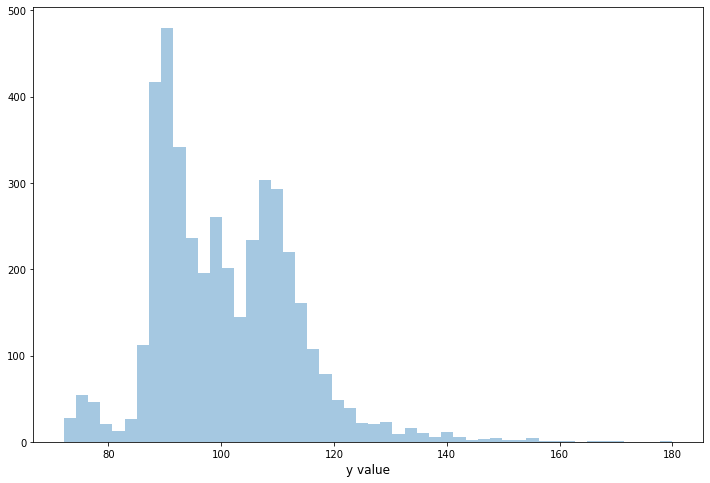

In [6]:
ulimit = 180
df_train['y'].iloc[df_train['y']>ulimit] = ulimit

plt.figure(figsize=(12,8))
sns.distplot(df_train.y.values, bins=50, kde=False)
plt.xlabel('y value', fontsize=12)
plt.show()

In [7]:
# Now let us have a look at the data type of all the variables present in the dataset
dtype_data=df_train.dtypes.reset_index()
dtype_data.columns = ["Count", "Column Type"]
dtype_data.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


In [8]:
dtype_data.loc[:10,:]

,Count,Column Type
0,ID,int64
1,y,float64
2,X0,object
3,X1,object
4,X2,object
5,X3,object
6,X4,object
7,X5,object
8,X6,object
9,X8,object


In [9]:
df_train.isnull().sum().sum()

0

In [10]:
# Integer Columns Analysis
unique_value_dict = {}
for col in df_train.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(df_train[col].unique()).tolist())
        t_list = unique_value_dict.get(unique_value, [])
        t_list.append(col)
        unique_value_dict[unique_value] = t_list[:]
for unique_val, columns in unique_value_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("-----------------------------------------------------------")

Columns containing the unique values :  [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145'

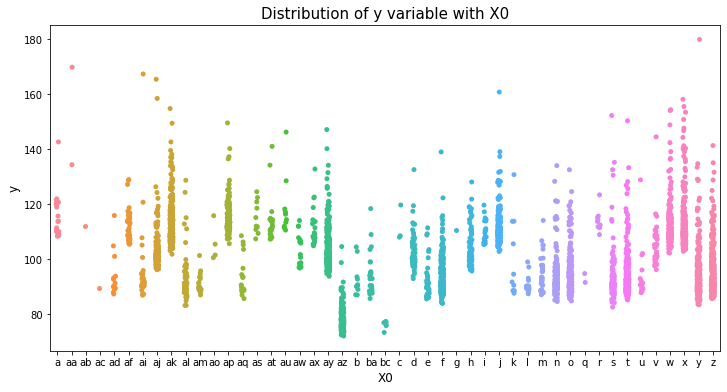

In [11]:
# Now let us explore the categorical columns present in the dataset.
var="X0"
colu_order=np.sort(df_train[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var,y="y",data=df_train,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

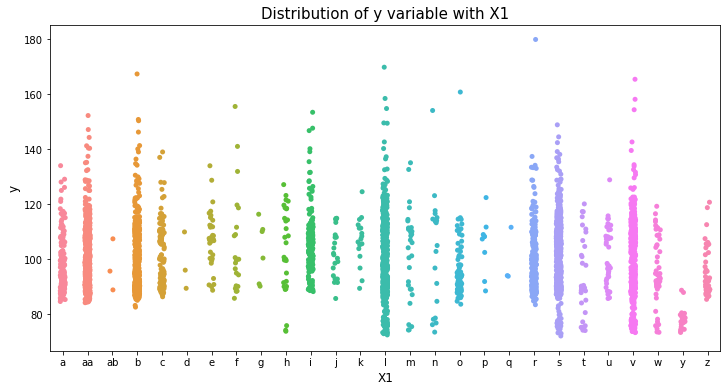

In [12]:
var="X1"
colu_order=np.sort(df_train[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var,y="y",data=df_train,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

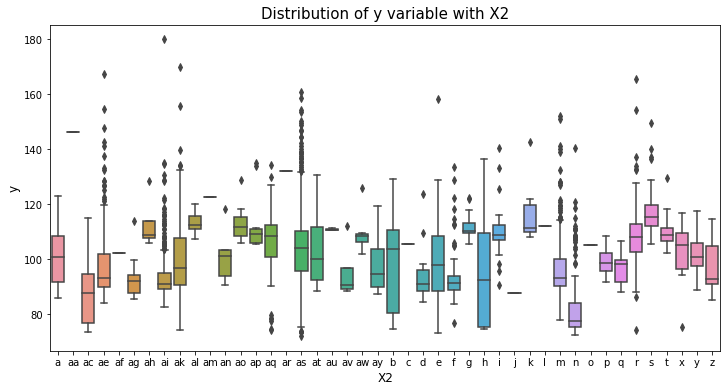

In [13]:
var="X2"
colu_order=np.sort(df_train[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var,y="y",data=df_train,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

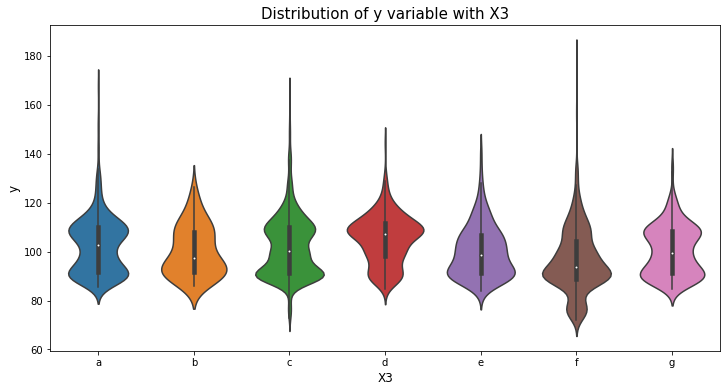

In [14]:
var="X3"
colu_order=np.sort(df_train[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var,y="y",data=df_train,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

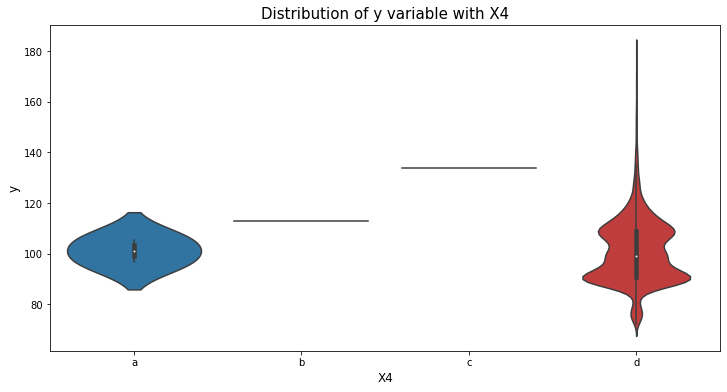

In [15]:
var="X4"
colu_order=np.sort(df_train[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var,y="y",data=df_train,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

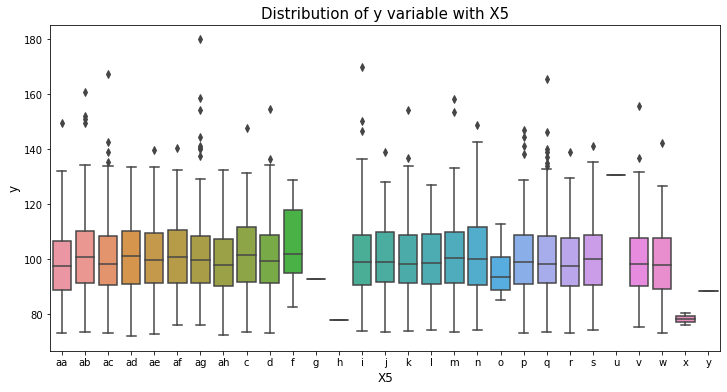

In [16]:
var="X5"
colu_order=np.sort(df_train[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var,y="y",data=df_train,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

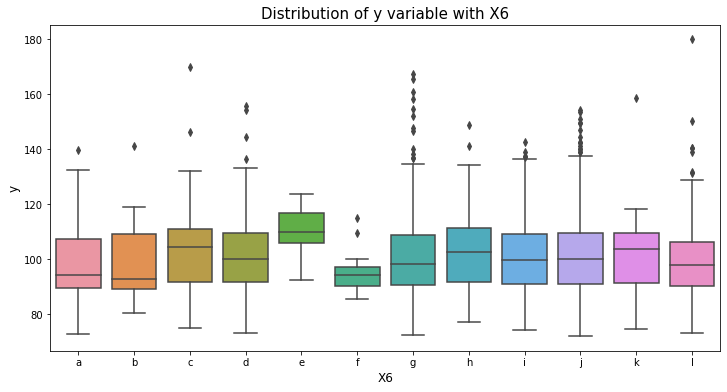

In [17]:
var="X6"
colu_order=np.sort(df_train[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var,y="y",data=df_train,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

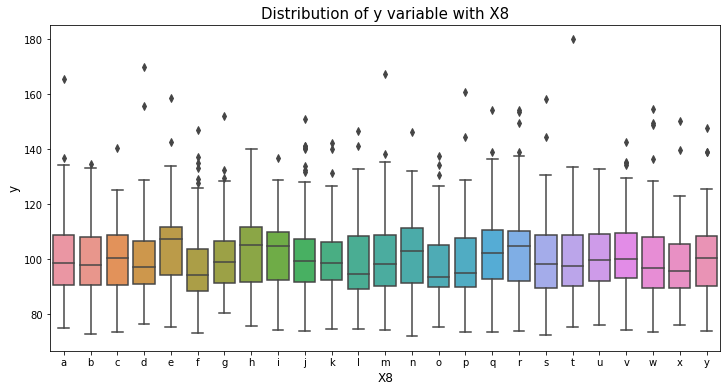

In [18]:
var="X8"
colu_order=np.sort(df_train[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var,y="y",data=df_train,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

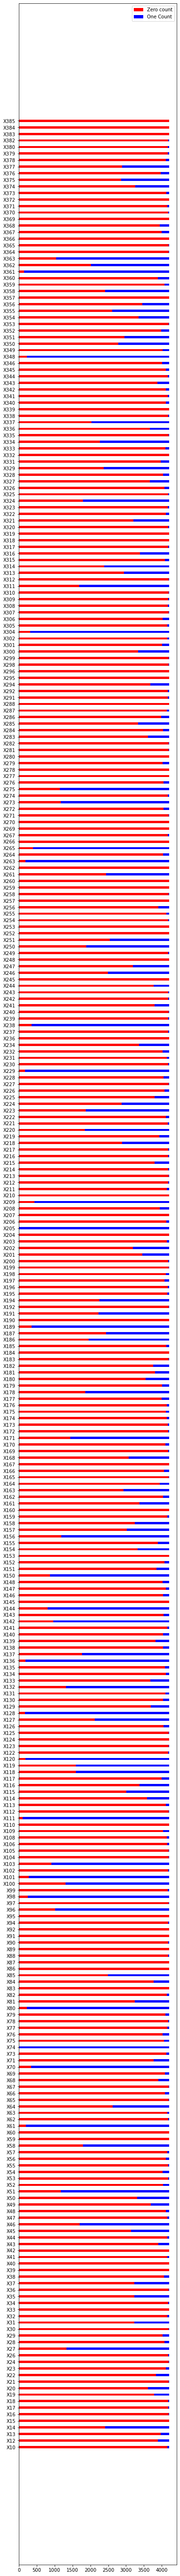

In [19]:
zero_list=[]
one_list=[]
col_list = unique_value_dict['[0, 1]']
for col in col_list:
    zero_list.append((df_train[col]==0).sum())
    one_list.append((df_train[col]==1).sum())
l = len(col_list)
arr = np.arange(l)
width = 0.35
plt.figure(figsize=(6,100))
plot_1 = plt.barh(arr, zero_list, width, color='red')
plot_2 = plt.barh(arr, one_list, width, left=zero_list, color="blue")
plt.yticks(arr, col_list)
plt.legend((plot_1[0], plot_2[0]), ('Zero count', 'One Count'))
plt.show()

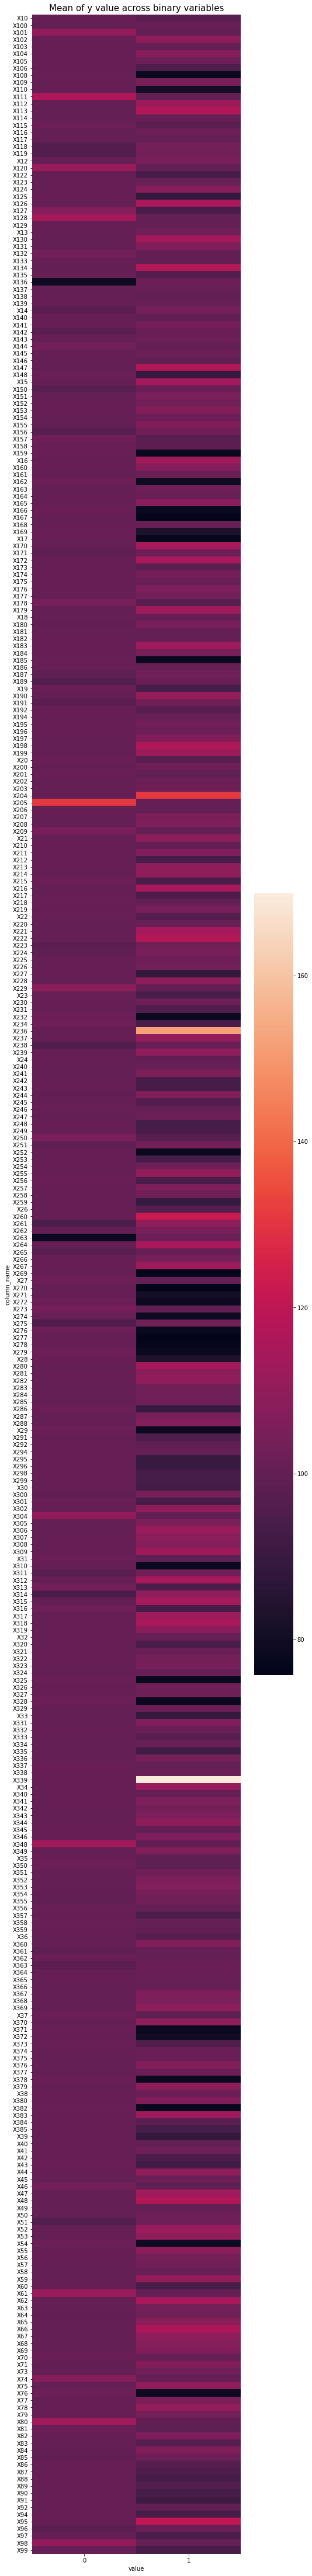

In [20]:
zero_mean_list = []
one_mean_list = []
cols_list = unique_value_dict['[0, 1]']
for col in cols_list:
    zero_mean_list.append(df_train.loc[df_train[col]==0].y.mean())
    one_mean_list.append(df_train.loc[df_train[col]==1].y.mean())
new_df = pd.DataFrame({"column_name":cols_list+cols_list, "value":[0]*len(cols_list) + [1]*len(cols_list), "y_mean":zero_mean_list+one_mean_list})
new_df = new_df.pivot('column_name', 'value', 'y_mean')

plt.figure(figsize=(8,80))
sns.heatmap(new_df)
plt.title("Mean of y value across binary variables", fontsize=15)
plt.show()

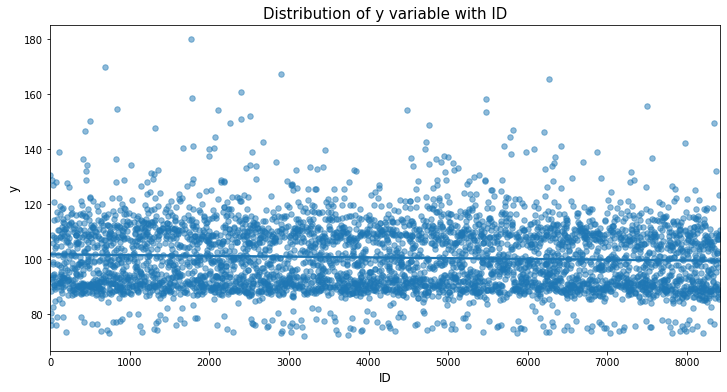

In [21]:
var = "ID"
plt.figure(figsize=(12,6))
sns.regplot(x=var, y='y', data=df_train, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

In [23]:
for f in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df_train[f].values)) 
        df_train[f] = lbl.transform(list(df_train[f].values))
        
train_y = df_train['y'].values
train_X =df_train.drop(["ID", "y"], axis=1)


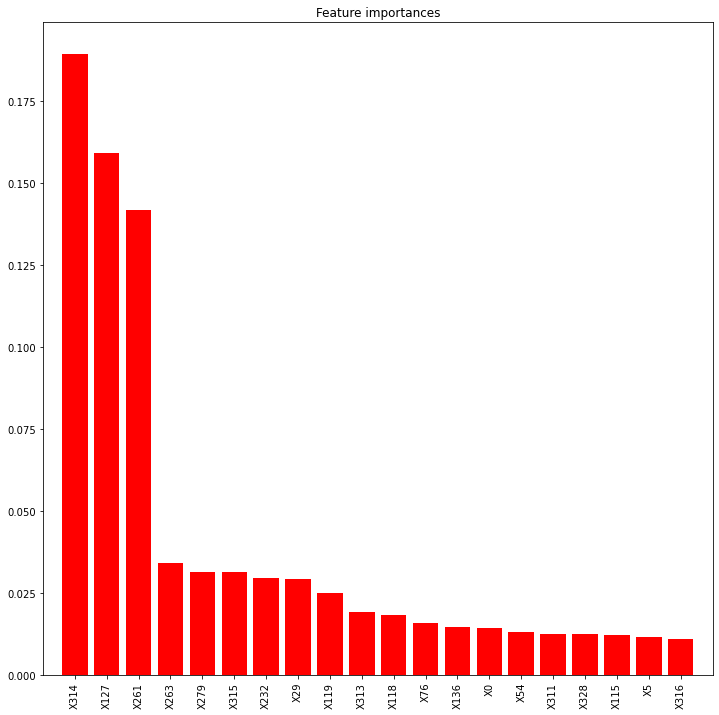

In [24]:
from sklearn import ensemble
model = ensemble.RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
model.fit(train_X, train_y)
feat_names = train_X.columns.values

## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()